"Write a Data Science Blog Post" Project

In this project, i used Seattle AirBNB data, in which it includes information of the listings offered in Seattle, WA.

after exploring the data, I got curious about the following questions:
    - How many listings are in each neighbourhood? 
    - Which hosts are running a business with multiple listings and where they? 
    - Average of prices for each neighborhood?
    - and building a model for Price Predections for listings

1- Data Understanding and importing required libraries

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv('./listings.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,2.020000e+13,1/4/2016,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,2.020000e+13,1/4/2016,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,2.020000e+13,1/4/2016,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,2.020000e+13,1/4/2016,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,2.020000e+13,1/4/2016,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [49]:
num_rows = df.shape[0] #Provide the number of rows in the dataset
num_cols = df.shape[1] #Provide the number of columns in the dataset

print("There are", num_rows,"rows in the dataset, and", num_cols, "columns")

There are 3818 rows in the dataset, and 92 columns


In [50]:
# Checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   float64
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [51]:
#Provide a set of columns with more than 50% of the values missing

most_missing_cols = set(df.columns[df.isnull().mean() > 0.5])

print(most_missing_cols)
# If needed, i will deal with these columns, otherwise i would ignore them

{'license', 'monthly_price', 'square_feet', 'security_deposit'}


2- Data Preparation; includes answering the questions, and filling null values



In [52]:
# Answering the first question:How many listings are in each neighbourhood?

Count_of_Listings= pd.DataFrame(df['neighbourhood_group_cleansed'].value_counts())


print(Count_of_Listings)

                     neighbourhood_group_cleansed
Other neighborhoods                           794
Capitol Hill                                  567
Downtown                                      530
Central Area                                  369
Queen Anne                                    295
Ballard                                       230
West Seattle                                  203
Rainier Valley                                159
University District                           122
Beacon Hill                                   118
Cascade                                        89
Northgate                                      80
Delridge                                       79
Lake City                                      67
Magnolia                                       61
Seward Park                                    44
Interbay                                       11


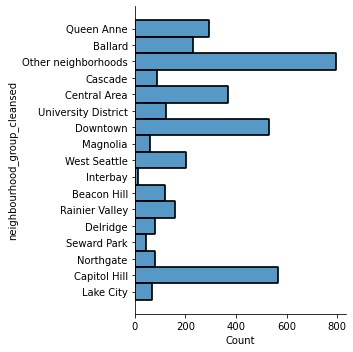

In [53]:
#Visualizing result
sns.displot(y='neighbourhood_group_cleansed', bins=5, data=df)

In [54]:
#Which hosts are running a business with multiple listings and where they? 

Hosts=df.query("host_total_listings_count > 1")
Hosts_Multiple_Listings= pd.DataFrame(Hosts[['host_id','host_name','neighbourhood_group_cleansed','host_location']])
display(Hosts_Multiple_Listings)

,host_id,host_name,neighbourhood_group_cleansed,host_location
0,956883,Maija,Queen Anne,"Seattle, Washington, United States"
1,5177328,Andrea,Queen Anne,"Seattle, Washington, United States"
2,16708587,Jill,Queen Anne,"Seattle, Washington, United States"
4,1452570,Emily,Queen Anne,"Seattle, Washington, United States"
7,4016632,Jean-Marc,Queen Anne,"Seattle, Washington, United States"
...,...,...,...,...
3803,5325329,Blair,Other neighborhoods,"Seattle, Washington, United States"
3806,6963318,Grace,Other neighborhoods,"Seattle, Washington, United States"
3808,7964921,Charlie & Sarah,Other neighborhoods,"Seattle, Washington, United States"
3812,3443346,Jacqueline,Other neighborhoods,"Seattle, Washington, United States"


In [55]:
# Average of prices for each neighbourhood
# the data type for the 'price' column is int as shown above 
Avg_prices_neighbourhood= df.groupby('neighbourhood_group_cleansed')['price'].agg(mean).sort_values()
display(Avg_prices_neighbourhood)

neighbourhood_group_cleansed
Delridge                83.278481
Northgate               88.550000
Rainier Valley          91.899371
Lake City               92.671642
University District     93.639344
Beacon Hill             94.669492
Seward Park            108.477273
Interbay               109.727273
Other neighborhoods    119.968514
Ballard                124.682609
Central Area           128.338753
Capitol Hill           130.592593
Cascade                140.101124
West Seattle           141.359606
Downtown               154.405660
Queen Anne             157.223729
Magnolia               177.672131
Name: price, dtype: float64

Price Predection; building a model to predect listings prices based on the services provided 


In [56]:
#First, creating a dataset that incudes all the needed columns, then checking columns datatypes and if they include null values

df_listings=df[['accommodates','bathrooms','bedrooms', 'guests_included', 'extra_people','review_scores_value','price']]
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   accommodates         3818 non-null   int64  
 1   bathrooms            3802 non-null   float64
 2   bedrooms             3812 non-null   float64
 3   guests_included      3818 non-null   int64  
 4   extra_people         3818 non-null   int64  
 5   review_scores_value  3162 non-null   float64
 6   price                3818 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 208.9 KB


In [57]:
df_listings.isnull().sum()

accommodates             0
bathrooms               16
bedrooms                 6
guests_included          0
extra_people             0
review_scores_value    656
price                    0
dtype: int64

In [58]:
#Removing null values
df_listings['bathrooms'].fillna(0, inplace=True)
df_listings['bedrooms'].fillna(0, inplace=True)
df_listings['review_scores_value'].fillna(0, inplace=True)

C:\Users\bayan\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [59]:
#check the info again

df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   accommodates         3818 non-null   int64  
 1   bathrooms            3818 non-null   float64
 2   bedrooms             3818 non-null   float64
 3   guests_included      3818 non-null   int64  
 4   extra_people         3818 non-null   int64  
 5   review_scores_value  3818 non-null   float64
 6   price                3818 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 208.9 KB


<AxesSubplot:>

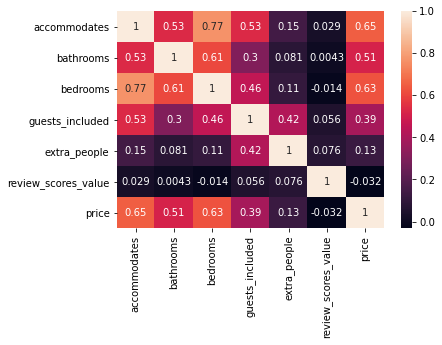

In [60]:
#Creating a heatmap to visualize correlation between the selected features
sns.heatmap(df_listings.corr(), annot=True)

In [61]:
#from df_listings, will create two datasets and we will be execluding 'extra_people' and 'review_scores_value' features from our model since they have low correlation with our target 'price'

X= df_listings[['accommodates','bathrooms','bedrooms','guests_included']]

Y= df_listings['price']

In [62]:
#splitting the dataset into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=40)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2672, 4)
(1146, 4)
(2672,)
(1146,)


In [63]:
lm= LinearRegression()

In [64]:
lm.fit(X_train, Y_train)

LinearRegression()

In [65]:
predictions = lm.predict(X_test)

In [66]:
price_predictions= pd.DataFrame({'Actual':Y_test,'Predicted':predictions})
price_predictions['Difference']=np.abs(price_predictions.Actual-price_predictions.Predicted)
price_predictions.head(10)

,Actual,Predicted,Difference
3399,349,323.578984,25.421016
398,55,108.585009,53.585009
1774,100,91.011176,8.988824
2205,35,91.011176,56.011176
1185,120,127.358598,7.358598
1401,115,109.784765,5.215235
2127,135,150.460275,15.460275
3592,165,211.109130,46.109130
2456,86,109.784765,23.784765
1226,175,108.585009,66.414991


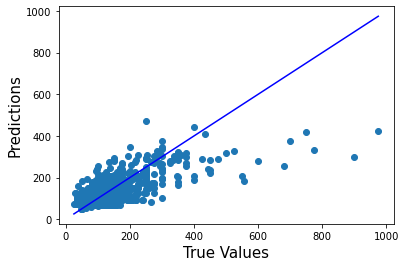

In [70]:
#plotting predictions and actual prices to validate the model


plt.scatter(Y_test,predictions)
p1 = max(max(predictions), max(Y_test))
p2 = min(min(predictions), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.show()


In [41]:
#Showing coefficient for the variables to determine feature importance 
coeff_df= pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
accommodates,17.573833
bathrooms,20.728400
bedrooms,23.101677
guests_included,1.199756
